### 1. hiden files/folders
- mac: use 'Command + Shift + .' to toggle 
- windows: file-exploer - view - show hidden files


### 2. environmental variables 

In [9]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [11]:
api_key = os.getenv('ALPACA_API_KEY')
secret_key = os.getenv('ALPACA_SECRET_KEY')
print(api_key)
print(secret_key)

PKPV5JZ5JQEGZW5EOH3N
iyKpolPtKWtDfJeiUXR1erLhEuxDii48qYVWb0kh


### Activity 3 create Alpaca key and secret keys 

### 3. alpaca API
- review what is api? do a function call remotely, message passing
- most company provide lib for api calls

### 4. install alpaca API
- pip install alpaca_trade_api (this is an old version)
- pip install alpaca-py ( new version, not needed right now)
- restart Kernel 

### 5. interact with alpaca API

In [13]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi

%matplotlib inline

## Create a DataFrame with the current amount of shares

In [16]:
# msft and appl
# shares_data = {'shares': [200, 320]}
tickers = ['MSFT','AAPL']

# # create the df
# df_shares = pd.DataFrame(shares_data, index = tickers)

# df_shares

shares_data = {'tickers': ['MSFT','AAPL'], 'shares': [200, 320]}

df_shares = pd.DataFrame(shares_data)
df_shares.set_index('tickers', inplace= True)
df_shares



,shares
tickers,
MSFT,200
AAPL,320


## Load and Verify Environment Variables

In [17]:
load_dotenv()

True

In [18]:
api_key = os.getenv('ALPACA_API_KEY')
secret_key = os.getenv('ALPACA_SECRET_KEY')
print(api_key)
print(secret_key)

PKPV5JZ5JQEGZW5EOH3N
iyKpolPtKWtDfJeiUXR1erLhEuxDii48qYVWb0kh


## Create the Alpaca API Object

In [19]:
alpaca = tradeapi.REST(api_key, secret_key, api_version='v2')

## Set a variable `today` with current date using ISO format

In [20]:
today = pd.Timestamp('2023-12-12', tz='America/New_York').isoformat()
today

'2023-12-12T00:00:00-05:00'

## Set a variable `timeframe` with value equal to `1Day`

In [22]:
timeframe = '1Day'

## Create a DataFrame with current price data for `MSFT` & `AAPL` using `alpaca.get_bars()`

In [23]:
df_portfolio = alpaca.get_bars(tickers, timeframe, start = today, end = today).df
df_portfolio

,close,high,low,trade_count,open,volume,vwap,symbol
timestamp,,,,,,,,
2023-12-12 05:00:00+00:00,194.71,194.72,191.721,509030,193.08,52708419,193.784173,AAPL
2023-12-12 05:00:00+00:00,374.38,374.42,370.460,340726,370.85,24869624,372.785960,MSFT


## Calculate the current value in dollars of the stock portfolio

In [27]:
AAPL = df_portfolio[df_portfolio['symbol'] == 'AAPL']
AAPL = AAPL.drop('symbol', axis = 1)
AAPL
MSFT = df_portfolio[df_portfolio['symbol']=='MSFT'].drop('symbol', axis=1)
MSFT

,close,high,low,trade_count,open,volume,vwap
timestamp,,,,,,,
2023-12-12 05:00:00+00:00,374.38,374.42,370.46,340726,370.85,24869624,372.78596


In [28]:
df_portfolio = pd.concat([AAPL, MSFT], axis = 1, keys = ['AAPL', 'MSFT'])
df_portfolio

AAPL                                       \
                            close    high      low trade_count    open   
timestamp                                                                
2023-12-12 05:00:00+00:00  194.71  194.72  191.721      509030  193.08   

                                                   MSFT                  \
                             volume        vwap   close    high     low   
timestamp                                                                 
2023-12-12 05:00:00+00:00  52708419  193.784173  374.38  374.42  370.46   

                                                                    
                          trade_count    open    volume       vwap  
timestamp                                                           
2023-12-12 05:00:00+00:00      340726  370.85  24869624  372.78596

In [30]:
msft_price = df_portfolio['MSFT']['close'].iloc[0]
msft_price
aapl_price = df_portfolio['AAPL']['close'].iloc[0]
aapl_price

194.71

In [33]:
msft_value = msft_price * df_shares.loc["MSFT"]["shares"]
msft_value
aapl_value = aapl_price * df_shares.loc["AAPL"]["shares"]
aapl_value

62307.200000000004

In [35]:
value_data = {"MSFT": [msft_value], "AAPL": [aapl_value]}
df_value = pd.DataFrame(value_data)
df_value

,MSFT,AAPL
0,74876.0,62307.2


<Axes: title={'center': 'stock portfolio compositioin'}, ylabel='shares'>

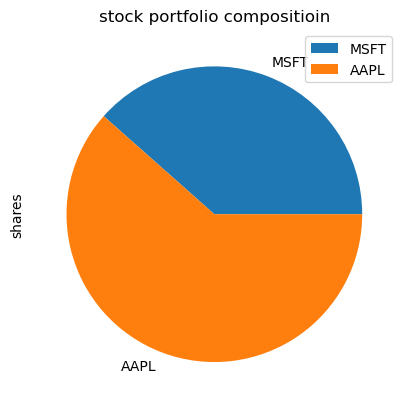

In [37]:
df_shares.plot.pie(y = 'shares', title = "stock portfolio compositioin")

## Plot stock portfolio composition

### Create a DataFrame with the current value of shares

<Axes: title={'center': 'current value in dollars of the stock portfolio'}>

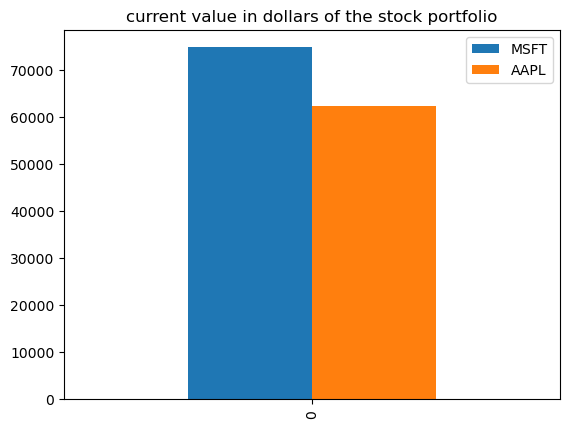

In [38]:
df_value.plot.bar(title = 'current value in dollars of the stock portfolio')

### 5. Activities 5